## Analysis Attempted By : Gaurav Kumar Vishwakarma

### Assignment: Exploratory Data Analysis on Facebook Utilization Data

#### Problem Statement:The objective of the proposed framework is to study and analyse the differences in the way users are using Facebook based on their gender, age-group, etc. and Identify a pattern out of it.


### Data Description:

Let's check the data files! According to the data description we should find the following columns:

- **Userid** - A numeric value uniquely identifying the user.
- **Age** -    Age of the user in years.
- **dob_day** - Day part of the user's date of birth.
- **dob_year** - Year part of the user's date of birth.
- **dob_month** -Month part of the user's date of birth.
- **gender** - Gender of the user.
- **tenure** - Number of days since the user has been on FB.
- **friend_count** - Number of friends the user has.
- **friendships_initiated** - Number of friendships initiated by the user.
- **likes** - Total number of posts liked by the user.
- **likes_received** - Total Number of likes received by user's posts.
- **mobile_likes** - Number of posts liked by the user through mobile app.
- **mobile_likes_received** - Number of likes received by user through mobile app.
- **www_likes** - Number of posts liked by the user through web.
- **www_likes_received** - www_likes_received

### 1.1 Load Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data

In [4]:
fb_dataset = pd.read_csv(r"C:\Users\GAURAV KUMAR\Desktop\facebook user data - facebook user data.csv")

### File structure and content

In [5]:
# Check the first 5 row from the dataset
fb_dataset.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [6]:
# Checking number of rows and columns
fb_dataset.shape

(99003, 15)

In [7]:
# Checking the dataset schema
fb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

### Missing Values
Knowing about missing values is important because they indicate how much we don’t know about our data. Making inferences based on just a few cases is often unwise. In addition, many modelling procedures break down when missing values are involved and the corresponding rows will either have to be removed completely or the values need to be estimated somehow.

In [8]:
np.sum(pd.isnull(fb_dataset))

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [9]:
# Checkig the total count of gender columns
fb_dataset1 = fb_dataset['gender'].value_counts().reset_index().rename(columns={'gender':'count','index':'gender'})
fb_dataset1.sort_values('gender', ascending = True, inplace = True)
fb_dataset1

,gender,count
1,female,40254
0,male,58574


### Imputation method for categorical columns:
When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category. If the number of missing values is very large then it can be replaced with a new category.


In [10]:
# Fill missing value with the most frequent value of that column
fb_dataset["gender"] = fb_dataset["gender"].fillna("male")
fb_dataset.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   2
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

##### When the data is skewed, it is good to consider using median value for replacing the missing values. Note that imputing missing data with median value can only be done with numerical data.

In [11]:
# Fill missing value with the median 
fb_dataset['tenure'].fillna(fb_dataset['tenure'].median(), inplace = True)

In [12]:
fb_dataset.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

Now, in this dataset we do not have any missing values which is great.

### 1.2 Data Visualization

#### Plotting Heatmap / correlation matrix on all the columns.

In [13]:
# Checking correlation matrix of all columns
fb_dataset.corr()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,1.000000,-0.007265,-0.000839,0.007265,0.002924,-0.003449,-0.001314,-0.001591,-0.002875,0.001526,-0.004868,0.001753,0.001828,0.001074
age,-0.007265,1.000000,0.035035,-1.000000,0.025167,0.462696,-0.027407,-0.058059,-0.013009,-0.022570,-0.026715,-0.024248,0.015585,-0.018224
dob_day,-0.000839,0.035035,1.000000,-0.035035,0.129443,0.041859,0.021961,0.022999,0.015980,0.001367,0.014541,0.000497,0.009353,0.002460
dob_year,0.007265,-1.000000,-0.035035,1.000000,-0.025167,-0.462696,0.027407,0.058059,0.013009,0.022570,0.026715,0.024248,-0.015585,0.018224
dob_month,0.002924,0.025167,0.129443,-0.025167,1.000000,0.029445,0.019804,0.020075,0.014147,0.006495,0.010400,0.006435,0.012136,0.006003
tenure,-0.003449,0.462696,0.041859,-0.462696,0.029445,1.000000,0.166257,0.133507,0.057133,0.027745,0.028053,0.023971,0.070757,0.030553
friend_count,-0.001314,-0.027407,0.021961,0.027407,0.019804,0.166257,1.000000,0.825850,0.298017,0.236463,0.235656,0.232701,0.229803,0.220727
friendships_initiated,-0.001591,-0.058059,0.022999,0.058059,0.020075,0.133507,0.825850,1.000000,0.285592,0.175131,0.229808,0.173804,0.214022,0.161439
likes,-0.002875,-0.013009,0.015980,0.013009,0.014147,0.057133,0.298017,0.285592,1.000000,0.327376,0.871652,0.329258,0.644960,0.295687
likes_received,0.001526,-0.022570,0.001367,0.022570,0.006495,0.027745,0.236463,0.175131,0.327376,1.000000,0.256998,0.973679,0.255365,0.947990


Text(0.5, 1, 'Correlations matrix of all the columns')

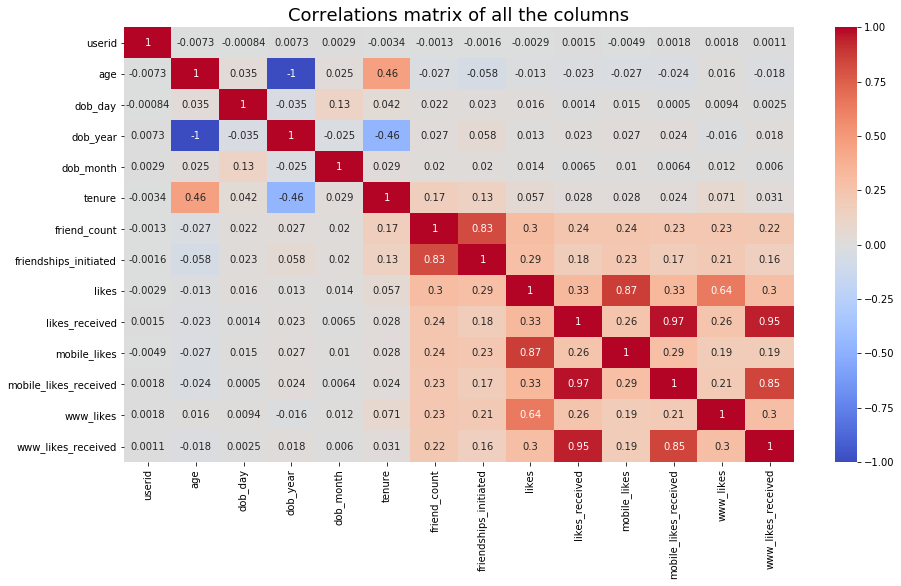

In [14]:
# Visualizing correlations and heatmap
corr = fb_dataset.corr()
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, cmap="coolwarm",center=0, annot = True, vmin= -1, vmax = 1)
ax.set_title("Correlations matrix of all the columns", size=18)

### 1.3 Analysis based on gender of the users

- **composition of male and female users**

([<matplotlib.patches.Wedge at 0x26794ab2388>,
 [Text(0.3760264520011851, -1.2444292295648638, 'female'),
  Text(-0.37602645200118495, 1.244429229564864, 'male')],
 [Text(0.3181762286163874, -1.0529785788625772, '41%'),
  Text(-0.3181762286163873, 1.0529785788625772, '59%')])

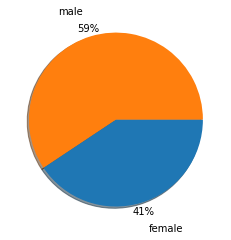

In [15]:
# Find genderwise user count %
temp = fb_dataset.groupby('gender').count()
plt.pie(temp['age'], labels=['female', 'male'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3, counterclock=False, shadow=True)

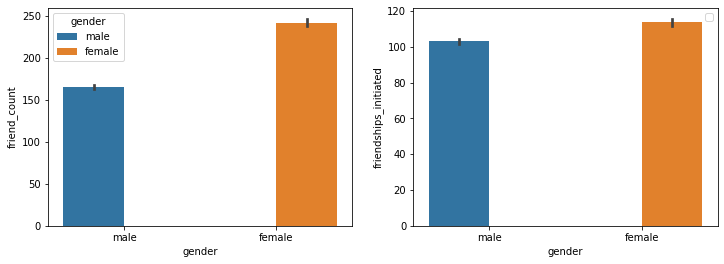

In [16]:
#categorywise of gender has more friends & initiated more friendships
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
g = sns.barplot(x='gender', y='friend_count', hue='gender', data=fb_dataset, ax=ax1);
g = sns.barplot(x='gender', y='friendships_initiated', hue='gender', data=fb_dataset, ax=ax2);
ax2.legend("")
plt.close(2)
plt.close(3)

- **Categorywise of gender has more friends & initiated more friendships**

##### Female age group 11 to 60 are having friends and friend request more than male. Also overall Female friends and request friend count is more than male across the population.

In [18]:
# The following analysis we are doing against Date Of birth and Gender
labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80','81-90','91-100','101-110','111-120']
fb_dataset['age_group'] = pd.cut(fb_dataset.age, [10,20,30,40,50,60,70,80,90,100,110,120], right=True, labels=labels)
fb_dataset['age_group'] = fb_dataset['age_group'].astype('category')
lens = fb_dataset.copy()

C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


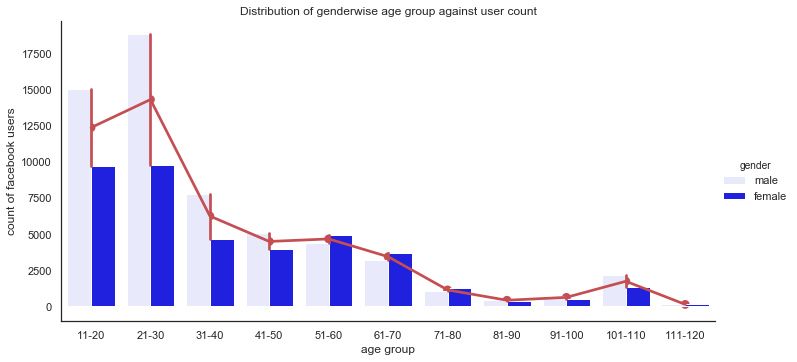

In [19]:
sns.set()
groupByAgeGroupAndGender = lens.groupby(['age_group','gender']).size().reset_index(name='counts')
with sns.axes_style('white'):
    g = sns.factorplot("age_group", data=lens, aspect=2,
                       kind="count", hue="gender", color='blue') 
    sns.pointplot(x='age_group', y='counts', data=groupByAgeGroupAndGender, color='r')

plt.title("Distribution of genderwise age group against user count")
plt.ylabel('count of facebook users')
plt.xlabel('age group');
plt.show()

- **distribution of tenure across different categories of gender**

#### It shows between age of 11 to 30 years users are using facebook twice more than 31 ownwards age group
#### It shows after age of 31 years many people are not using facebook as networking media. But age of 101 to 110 users are using more compare to other age group between 81-to-100. May be user has provided default date 1900 year while setting up the facebook profile so that age can be unknown/ignored.
#### Facebook used by Male is higher than Female user between 11 to 50 year age but after 51 age ownards female usage is gradually  increased in comparison to male population.

In [21]:
lens = lens.reset_index()

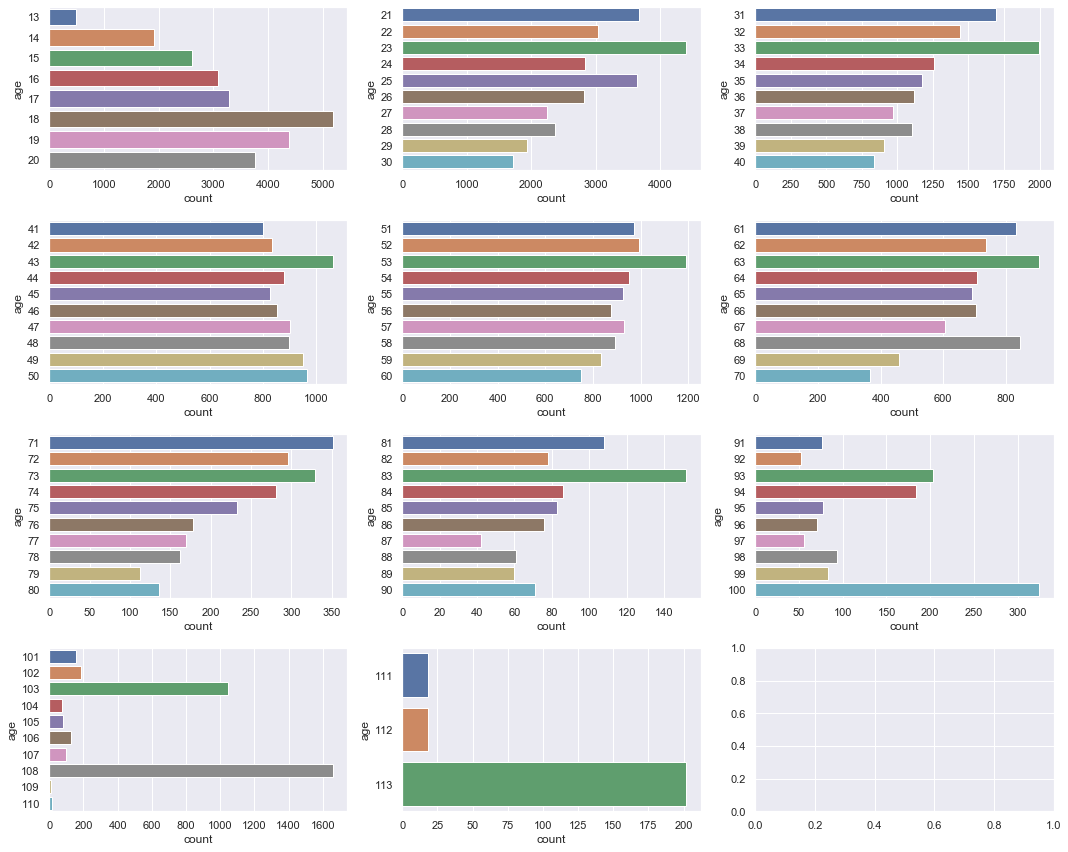

In [22]:
var = 'age'
fig, axes =plt.subplots(4,3, figsize=(15,12))
axes = axes.flatten()
for ax, i in zip(axes,labels):
    sns.countplot(y = var, data = lens[lens["age_group"] == i] ,ax=ax)
plt.tight_layout()  
plt.show()

##### From above graph it shows every 3rd and some age-group 8th year user count is higher compare to other years. Either users are providing incorrect detail by not specifying their year.

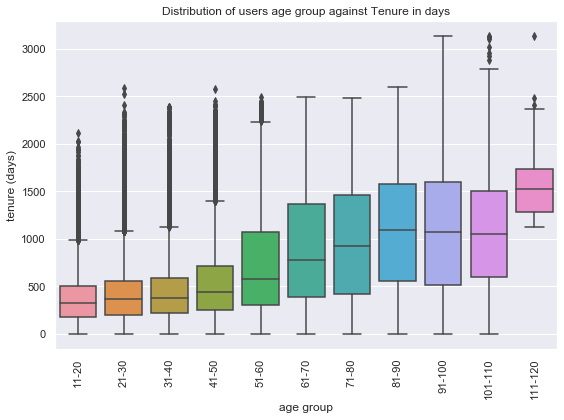

In [24]:
# Checking distribution of users age group against Tenure in days 
fig, ax = plt.subplots(figsize=(8,6))
g = sns.boxplot(x="age_group", y="tenure", data=lens);
#for ax in g.axes.flat: 
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("Distribution of users age group against Tenure in days")
plt.xlabel('age group');
plt.ylabel('tenure (days)');
plt.tight_layout()
plt.show()

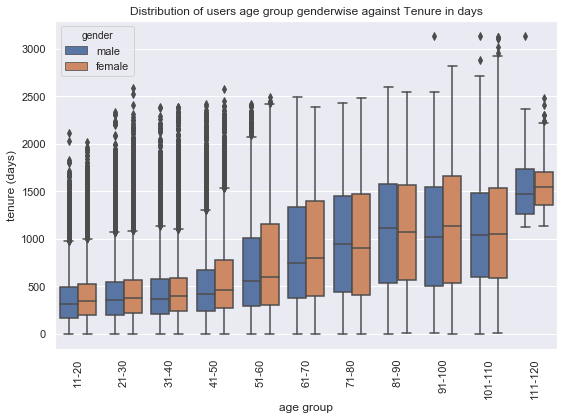

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="age_group", y="tenure", hue="gender", data=lens);
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("Distribution of users age group genderwise against Tenure in days")
plt.xlabel('age group');
plt.ylabel('tenure (days)');
plt.tight_layout()
plt.show()

##### The above tenure graph shows Facebook founded on 4th Feb 2004 since then user are using it hence max days are between 2005 to 2013 which is almost 8 to 9 years ago. Also from age and date of birth we can confirm that dataset created around 2013. 
##### It shows age group 90-99, 10 year ago started using Facebook for socialising. Even it suprising to see age group 20-29 where using Facebook almost 6-7 years ago i.e. 2006-2007.
##### Even though female user count is 40% but still Female tenure is higher compare to male across all age group

### 1.4 Analysis based on the least active users on Facebook

- **How many users have no friends?**
- **How many users did not like any posts?**
- **How many users did not receive any likes?**

C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


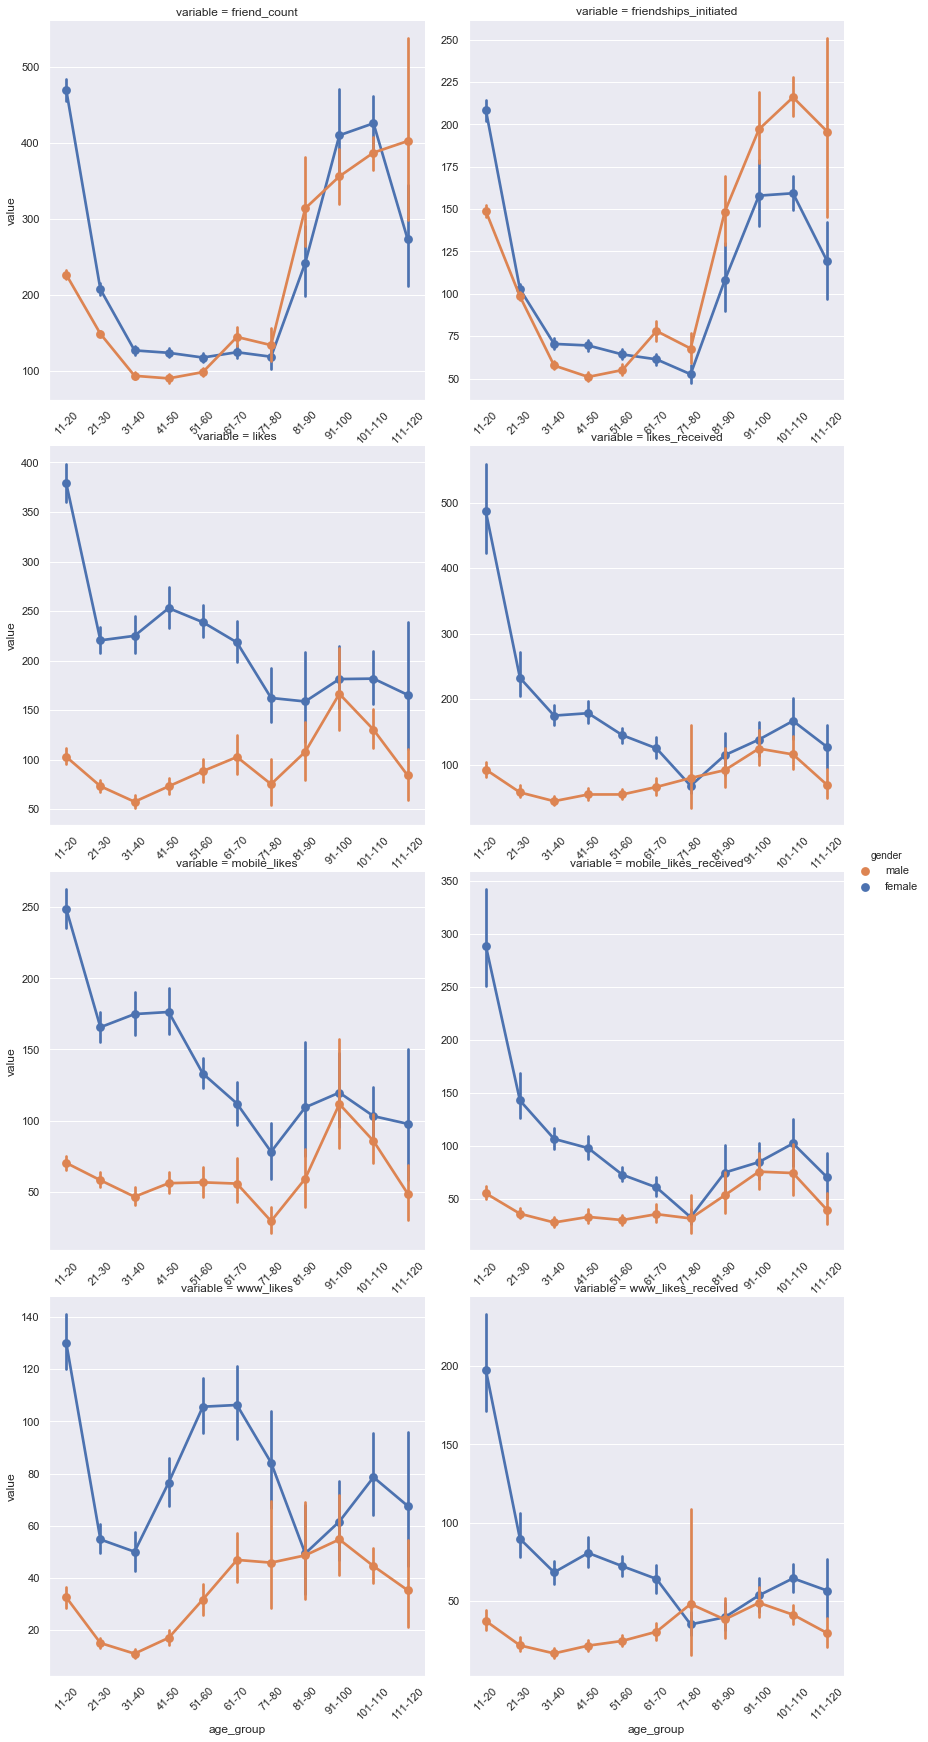

In [26]:
def boxplot(x, y, **kwargs):
    sns.pointplot(x=x, y=y)
    x=plt.xticks(rotation=90)

lens.reset_index()
f = pd.melt(lens, id_vars=['age_group','gender'], value_vars=['friend_count','friendships_initiated',\
                                                              'likes', 'likes_received', \
                                                              'mobile_likes', 'mobile_likes_received',\
                                                              'www_likes','www_likes_received'])
pal = dict(male="seagreen", female="gray")
g = sns.FacetGrid(f, col="variable", hue='gender',palette=pal, col_wrap=2, sharex=False, sharey=False,size=6)
g = g.map(sns.pointplot, "age_group", "value",'gender', palette='deep',hue_order=["female","male"])
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()

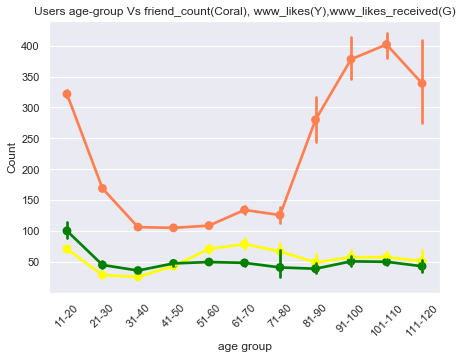

In [27]:
fig, ax = plt.subplots(figsize=(7,5))
with sns.axes_style('white'):
    g = sns.pointplot(x='age_group', y='friend_count', data=lens,color='coral');
    g = sns.pointplot(x='age_group', y='www_likes', data=lens,color='yellow');
    g = sns.pointplot(x='age_group', y='www_likes_received', data=lens,color='green');
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Users age-group Vs friend_count(Coral), www_likes(Y),www_likes_received(G)")
plt.xlabel('age group')
plt.ylabel('Count')
#plt.legend()
plt.show()

#### Friend Count Analysis
###### Already completed  (Age group  – tenure, Age group  – tenure & Gender)

We have converted Friend_count column into 400 friend count group as data varies from (0 to 5200 friend_count).

In [28]:
labels = ['0-400', '401-800', '800-1200', '1201-1600', '1601-2000', '2001-2400', '2401-2800','2801-3200','3201-3600','3601-4000','4001-4400', '4401-4800','4801-5200']
lens['friend_count_group'] = pd.cut(lens.friend_count, [-1,400,800,1200,1600,2000,2400,2800,3200,3600,4000,4400,4800,5200], right=True, labels=labels)
print("Distinct Day values: {}".format(lens["friend_count_group"].unique()))

Distinct Day values: [0-400, 401-800, 800-1200, 1201-1600, 1601-2000, ..., 4001-4400, 2401-2800, 4801-5200, 4401-4800, 3201-3600]
Length: 13
Categories (13, object): [0-400 < 401-800 < 800-1200 < 1201-1600 ... 3601-4000 < 4001-4400 < 4401-4800 < 4801-5200]


C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


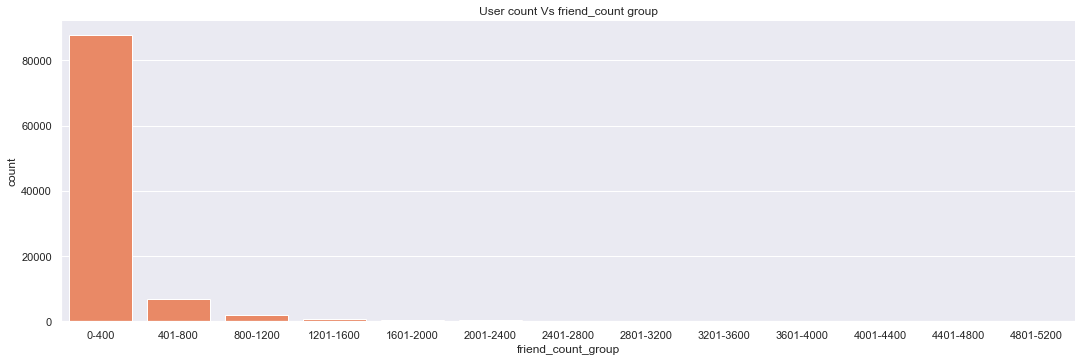

In [29]:
fig, ax = plt.subplots(figsize=(7,5))
sns.factorplot("friend_count_group", data=lens, aspect=3, kind="count", color='coral')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("User count Vs friend_count group")
plt.close(1)

In [30]:
# To make sure all the data is covered in Friend_count_group and no missing or null values for friend_count_group column.
lens.groupby('friend_count_group').count()

,index,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
friend_count_group,,,,,,,,,,,,,,,,,
0-400,87802,87802,87802,87802,87802,87802,87802,87802,87802,87802,87802,87802,87802,87802,87802,87802,87802
401-800,6977,6977,6977,6977,6977,6977,6977,6977,6977,6977,6977,6977,6977,6977,6977,6977,6977
800-1200,2049,2049,2049,2049,2049,2049,2049,2049,2049,2049,2049,2049,2049,2049,2049,2049,2049
1201-1600,821,821,821,821,821,821,821,821,821,821,821,821,821,821,821,821,821
1601-2000,440,440,440,440,440,440,440,440,440,440,440,440,440,440,440,440,440
2001-2400,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243
2401-2800,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160
2801-3200,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126
3201-3600,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91


In [32]:
# created sub group of Friend_count between 0 to 2600 as it covers 99% of User population.
labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '1201-1400','1401-1600','1601-1800','1801-2000','2001-2200', '2201-2400','2401-2600']
lens['friend_count_subgroup'] = pd.cut(lens.friend_count, [-1,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600], right=True, labels=labels)

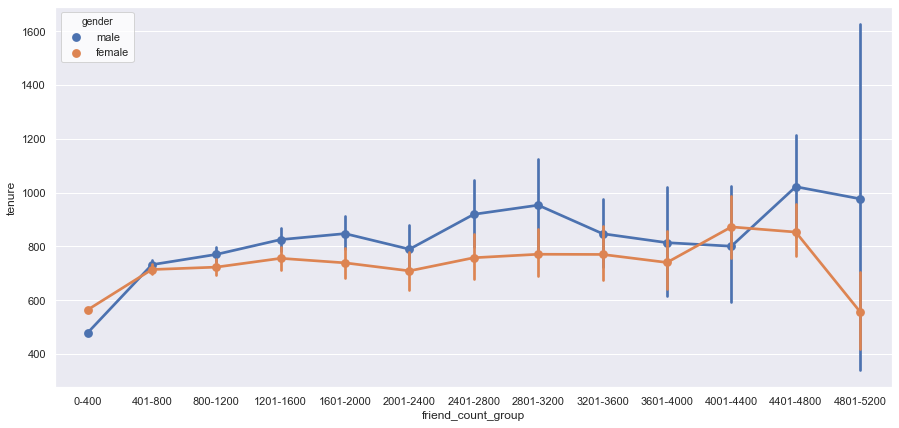

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
with sns.axes_style('white'):
    sns.pointplot(x='friend_count_group', y='tenure', hue='gender', data=lens);

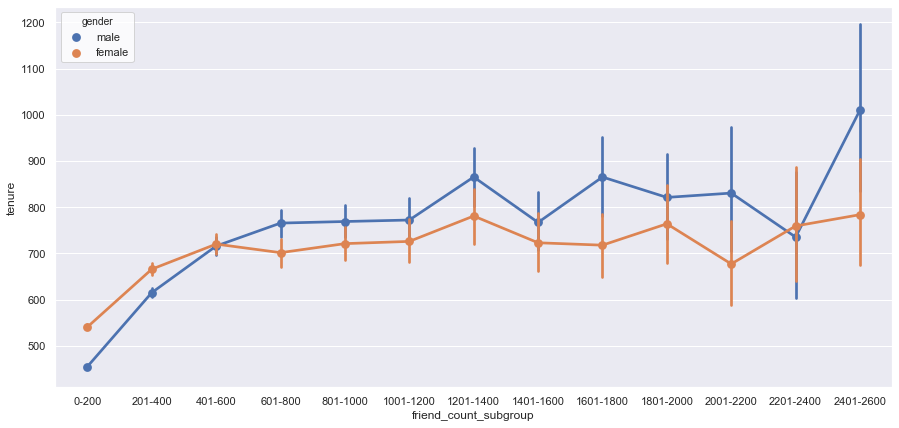

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
with sns.axes_style('white'):
    sns.pointplot(x='friend_count_subgroup', y='tenure', hue='gender', data=lens);

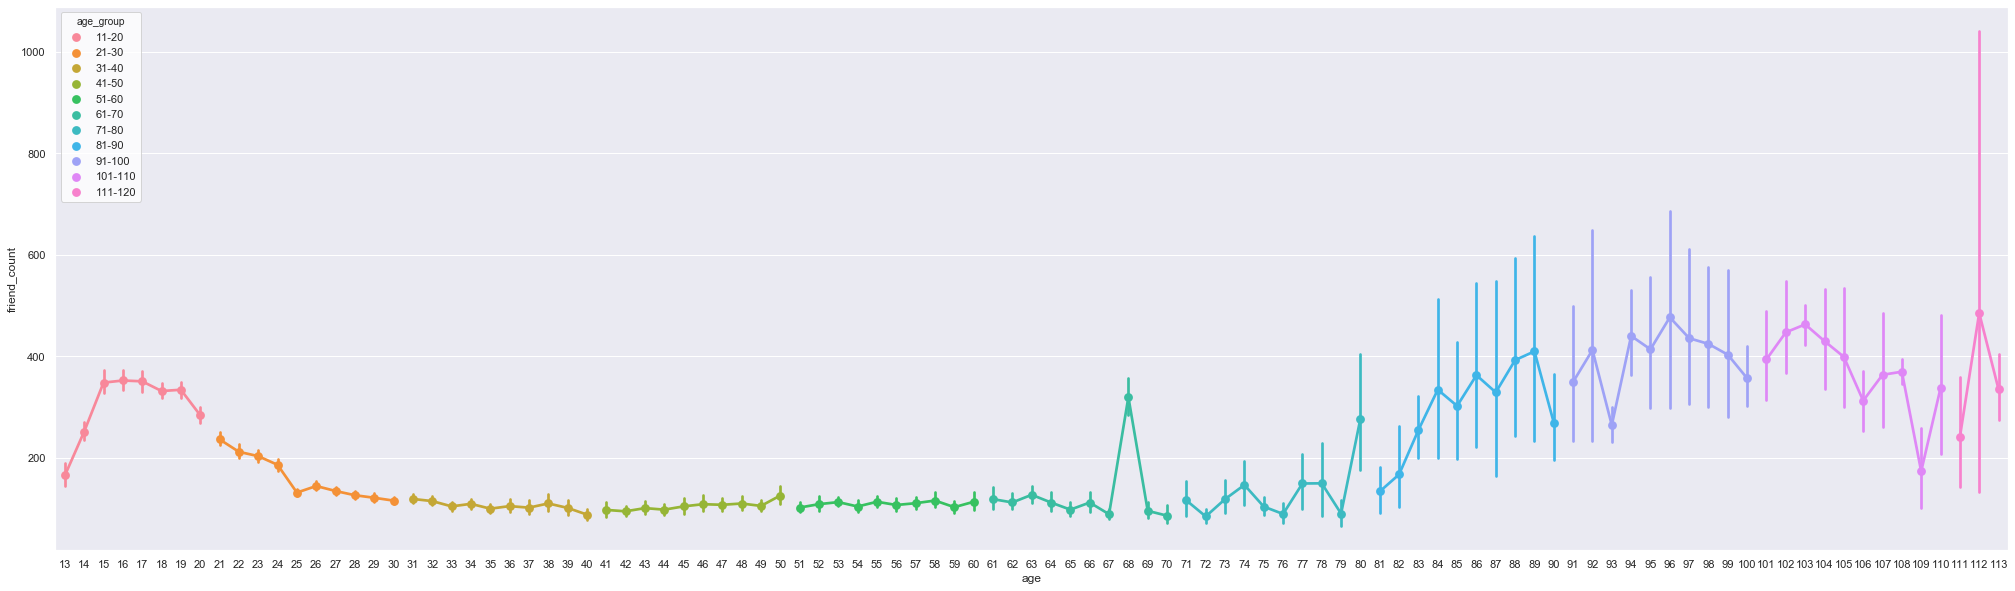

In [35]:
fig, ax = plt.subplots(figsize=(35,10))
with sns.axes_style('white'):
    sns.pointplot(y='friend_count', x='age',hue='age_group', data=lens); 

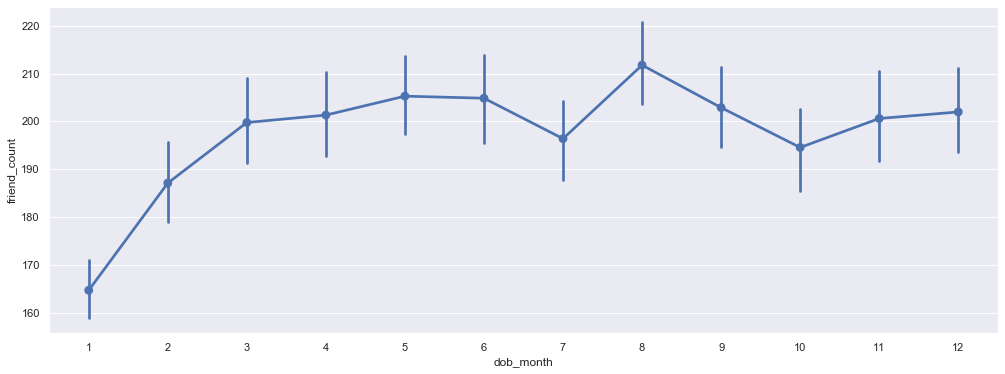

In [36]:
fig, ax = plt.subplots(figsize=(17,6))
with sns.axes_style('white'):
    sns.pointplot(y='friend_count', x='dob_month', data=lens); 

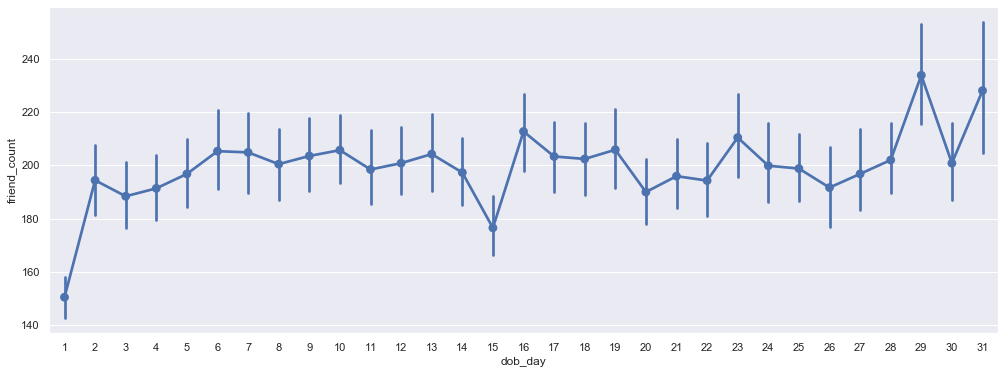

In [37]:
fig, ax = plt.subplots(figsize=(17,6))
with sns.axes_style('white'):
    sns.pointplot(y='friend_count', x='dob_day', data=lens); 

### 1.5 Analysis based on the user accessibility (Mobile Devices vs. Web Devices)

- **What is the average number of posts liked by users (based on gender) through web vs.mobile devices?**
- **What is the average number of likes received by users (based on gender) through webvs. mobile devices?**

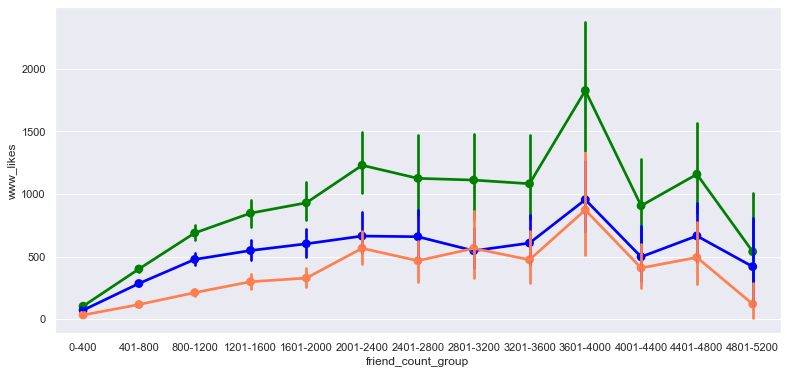

In [39]:
fig, ax = plt.subplots(figsize=(13,6))
sns.pointplot(x='friend_count_group', y='likes', labels="likes", data=lens,color='green',legend=True); 
sns.pointplot(x='friend_count_group', y='mobile_likes', data=lens,color='blue',lable='mobile_likes',legend=True); 
sns.pointplot(x='friend_count_group', y='www_likes', data=lens,color='coral',lable='www_likes',legend=True);

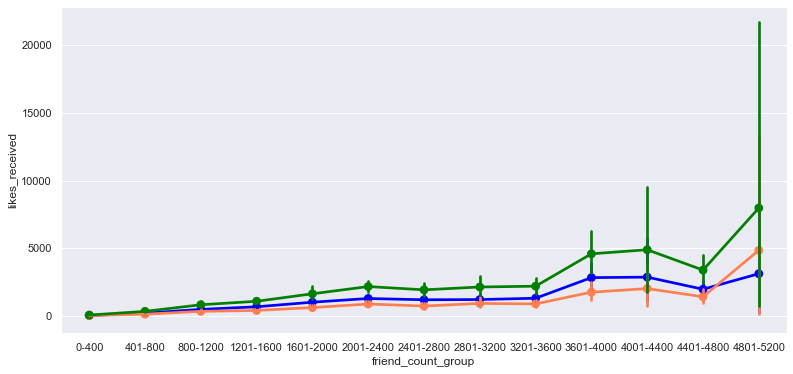

In [40]:
fig, ax = plt.subplots(figsize=(13,6))
sns.pointplot(x='friend_count_group', y='mobile_likes_received', data=lens,color='blue',lable='mobile_likes_received',legend=True); 
sns.pointplot(x='friend_count_group', y='www_likes_received', data=lens,color='coral',lable='www_likes_received',legend=True);
sns.pointplot(x='friend_count_group', y='likes_received', labels="likes_received", data=lens,color='green',legend=True);

Text(0.5, 1.0, 'Friend count subgroup Vs likes_received(G), mobile_likes_received(B) & www_likes_received(coral)')

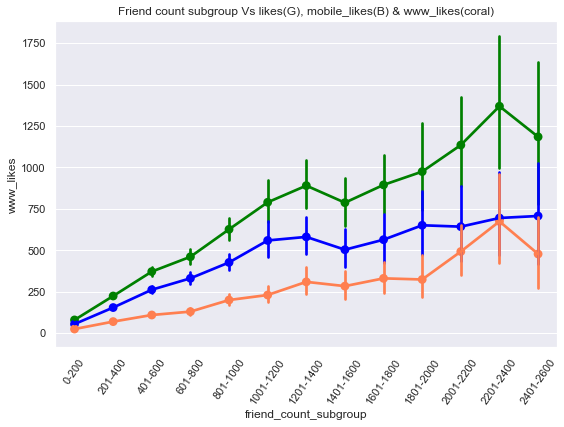

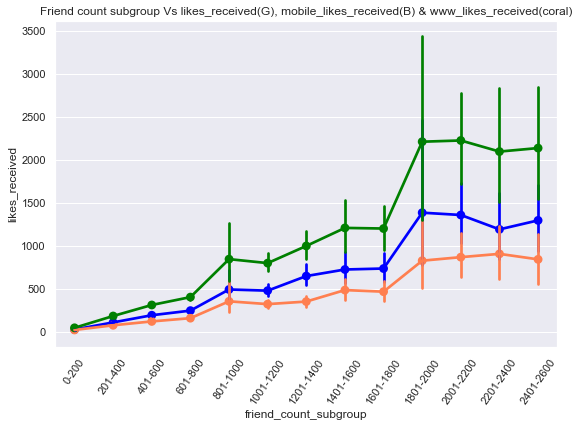

In [41]:
fig, ax = plt.subplots(figsize=(9,6))
#with sns.axes_style('white'):
sns.pointplot(x='friend_count_subgroup', y='likes', labels="likes", data=lens,color='green',legend=True); 
sns.pointplot(x='friend_count_subgroup', y='mobile_likes', data=lens,color='blue',lable='mobile_likes',legend=True); 
sns.pointplot(x='friend_count_subgroup', y='www_likes', data=lens,color='coral',lable='www_likes',legend=True);
for tick in ax.get_xticklabels():
            tick.set_rotation(55)
plt.title('Friend count subgroup Vs likes(G), mobile_likes(B) & www_likes(coral)')
fig, ax = plt.subplots(figsize=(9,6))
#with sns.axes_style('white'):
sns.pointplot(x='friend_count_subgroup', y='mobile_likes_received', data=lens,color='blue',lable='mobile_likes_received',legend=True); 
sns.pointplot(x='friend_count_subgroup', y='www_likes_received', data=lens,color='coral',lable='www_likes_received',legend=True);
sns.pointplot(x='friend_count_subgroup', y='likes_received', labels="likes_received", data=lens,color='green',legend=True);
for tick in ax.get_xticklabels():
            tick.set_rotation(55)
plt.title('Friend count subgroup Vs likes_received(G), mobile_likes_received(B) & www_likes_received(coral)')

#### Tenure Analysis
###### Already completed  (Age group  – tenure, Age group  – tenure & Gender, Friend_count group – tenure, Friend_count subgroup – tenure)

In [42]:
labels = ['1', '2', '3', '4','5', '6','7','8','9']
lens['tenure_group'] = pd.cut(lens.tenure, [-1,365,730,1095,1460,1825,2190,2555,2920,3285], right=True, labels=labels)
print("Tenure group distinct values: {}".format(lens["tenure_group"].unique()))

Tenure group distinct values: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Categories (9, object): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]


In [43]:
lens.groupby("tenure_group").count()['userid']

tenure_group
1    43658
2    33368
3     9860
4     5448
5     4557
6     1507
7      581
8       15
9        9
Name: userid, dtype: int64

In [44]:
tenurePercentageChange = lens.groupby("tenure_group").count()['userid']
tenurePercentageChange[::-1].pct_change()

tenure_group
9          NaN
8     0.666667
7    37.733333
6     1.593804
5     2.023889
4     0.195523
3     0.809838
2     2.384178
1     0.308379
Name: userid, dtype: float64

C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


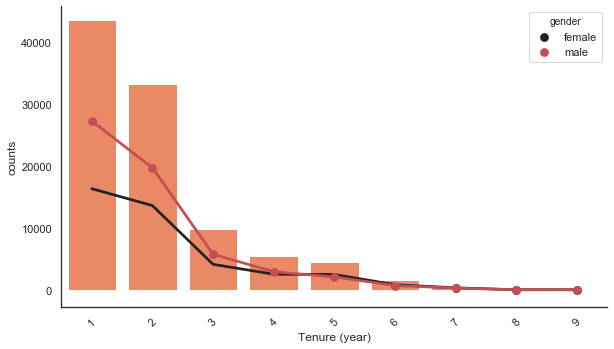

In [45]:
fig, ax = plt.subplots(figsize=(8,5))
groupBytenure = lens.groupby(['tenure_group',"gender"]).size().reset_index(name='counts')
with sns.axes_style('white'):
    g = sns.factorplot("tenure_group", data=lens, aspect=1.7,
                       kind="count", color='coral') 
    sns.pointplot(x='tenure_group', y='counts',hue="gender", data=groupBytenure, color='r')
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
plt.xlabel('Tenure (year)')
plt.close(1)

Text(0.5, 1.0, 'Tenure Yearwise Vs likes(G), mobile_likes(B) & www_likes(coral)')

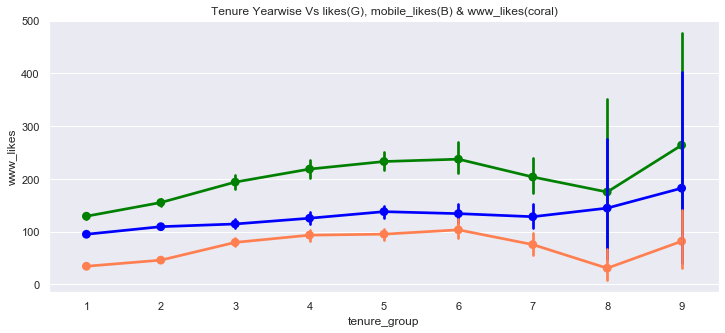

In [46]:
fig, ax = plt.subplots(figsize=(12,5))
#with sns.axes_style('white'):
g = sns.pointplot(x='tenure_group', y='likes', labels="likes", data=lens,color='green',legend=True); 
g = sns.pointplot(x='tenure_group', y='mobile_likes', data=lens,color='blue',lable='mobile_likes',legend=True); 
g = sns.pointplot(x='tenure_group', y='www_likes', data=lens,color='coral',lable='www_likes',legend=True);
plt.title('Tenure Yearwise Vs likes(G), mobile_likes(B) & www_likes(coral)')

Text(0.5, 1.0, 'Tenure Yearwise Vs likes_received(G), mobile_likes_received(B) & www_likes_received(coral)')

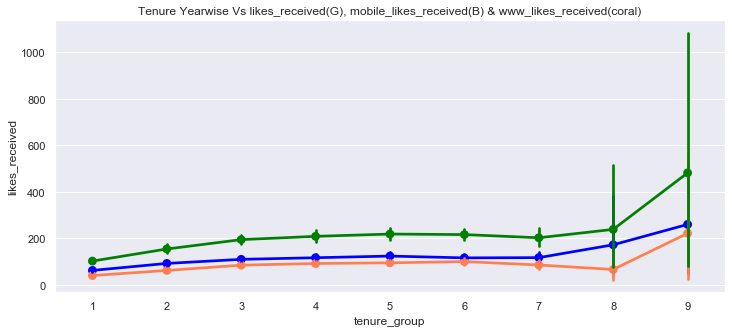

In [47]:
fig, ax = plt.subplots(figsize=(12,5))
#with sns.axes_style('white'):
sns.pointplot(x='tenure_group', y='mobile_likes_received', data=lens,color='blue',lable='mobile_likes_received',legend=True); 
sns.pointplot(x='tenure_group', y='www_likes_received', data=lens,color='coral',lable='www_likes_received',legend=True);
sns.pointplot(x='tenure_group', y='likes_received', labels="likes_received", data=lens,color='green',legend=True);
plt.title('Tenure Yearwise Vs likes_received(G), mobile_likes_received(B) & www_likes_received(coral)')

In [48]:
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700','701-800','801-900','901-1000','1001-1100', '1101-1200','1201-1300','1301-1400','1401-1500','1501-1600','1601-1700','1701-1800','1801-1900','1901-2000', '2001-3200']
lens['tenure_subgroup'] = pd.cut(lens.tenure, [-1,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,3200], right=True, labels=labels)
print("Tenure subgroup distinct values: {}".format(lens["tenure_subgroup"].unique()))

Tenure subgroup distinct values: [201-300, 0-100, 101-200, 501-600, 401-500, ..., 1301-1400, 1501-1600, 1801-1900, 1701-1800, 2001-3200]
Length: 21
Categories (21, object): [0-100 < 101-200 < 201-300 < 301-400 ... 1701-1800 < 1801-1900 < 1901-2000 < 2001-3200]


C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


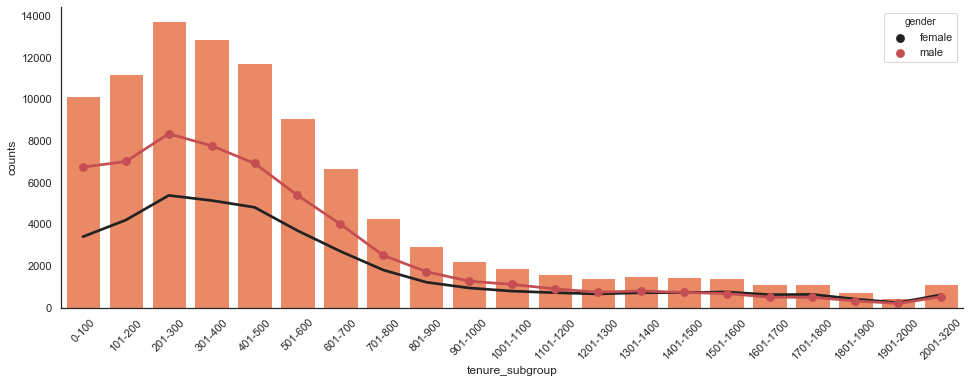

In [49]:
subgroupBytenure = lens.groupby(['tenure_subgroup',"gender"]).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(12,5))
with sns.axes_style('white'):
    g = sns.factorplot("tenure_subgroup", data=lens, aspect=2.7,
                       kind="count", color='coral') 
    sns.pointplot(x='tenure_subgroup', y='counts',hue="gender", data=subgroupBytenure, color='r')
for tick in g.ax.get_xticklabels():
    tick.set_rotation(45)
plt.close(1)

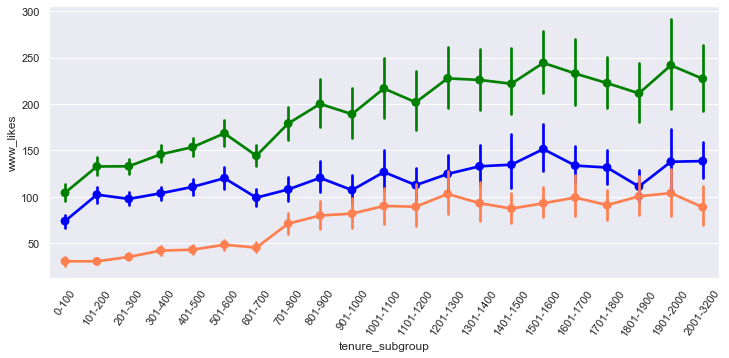

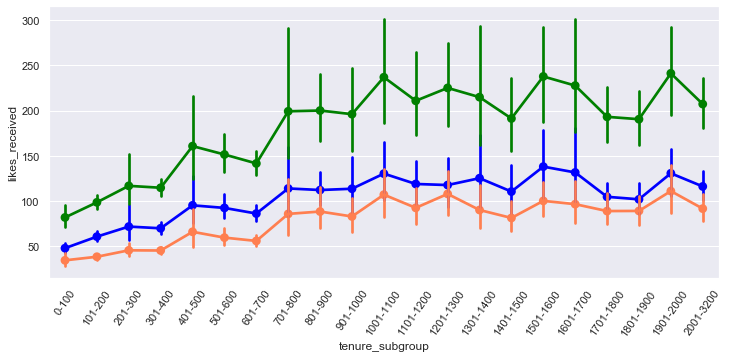

In [50]:
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(x='tenure_subgroup', y='likes', labels="likes", data=lens,color='green',legend=True); 
sns.pointplot(x='tenure_subgroup', y='mobile_likes', data=lens,color='blue',lable='mobile_likes',legend=True); 
sns.pointplot(x='tenure_subgroup', y='www_likes', data=lens,color='coral',lable='www_likes',legend=True);
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(x='tenure_subgroup', y='mobile_likes_received', data=lens,color='blue',lable='mobile_likes_received',legend=True); 
sns.pointplot(x='tenure_subgroup', y='www_likes_received', data=lens,color='coral',lable='www_likes_received',legend=True);
sns.pointplot(x='tenure_subgroup', y='likes_received', labels="likes_received", data=lens,color='green',legend=True);
for tick in ax.get_xticklabels():
    tick.set_rotation(55)

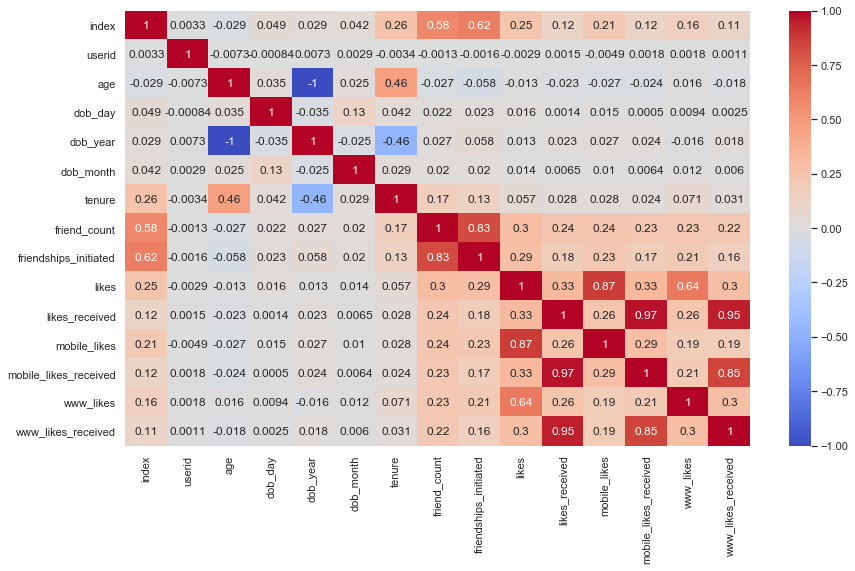

In [51]:
# Compute the correlation matrix
corr_df = lens.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 8))

# Draw a violinplot with a narrower bandwidth than the default
sns.heatmap(data=corr_df, annot = True, cmap='coolwarm')

sns.despine(left=True, bottom=True)

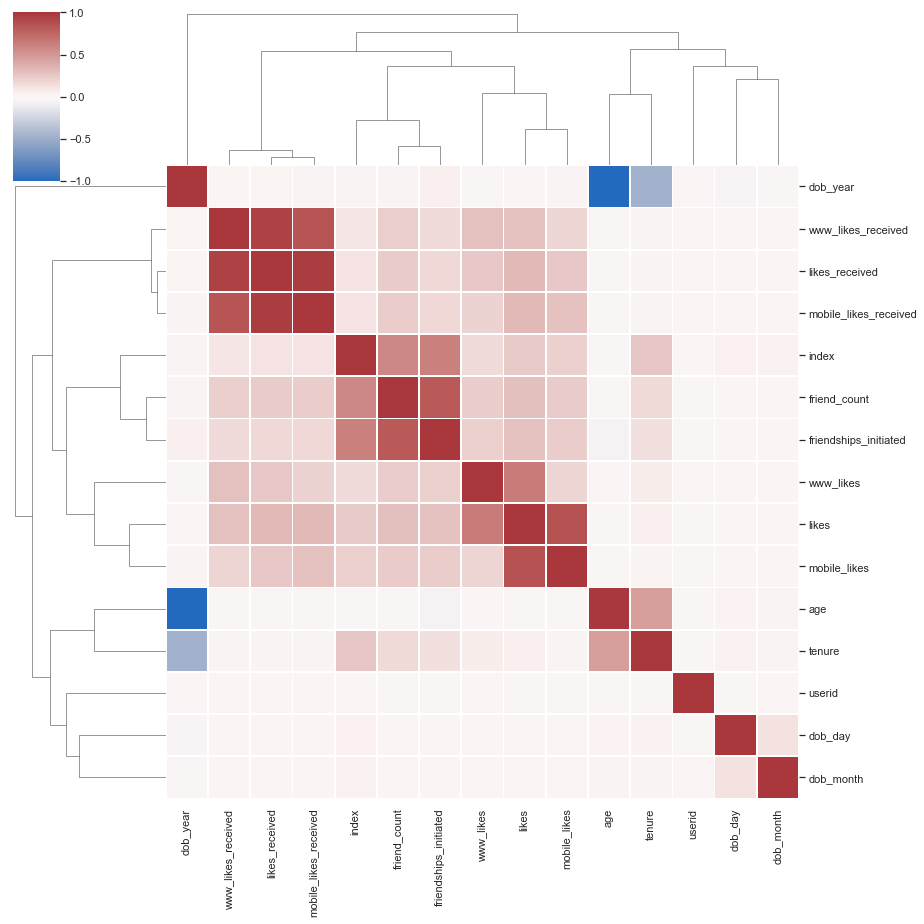

In [52]:
sns.clustermap(corr_df, center=0, cmap="vlag",linewidths=.75, figsize=(13, 13))

In [53]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, index to www_likes_received
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  15 non-null     float64
 1   userid                 15 non-null     float64
 2   age                    15 non-null     float64
 3   dob_day                15 non-null     float64
 4   dob_year               15 non-null     float64
 5   dob_month              15 non-null     float64
 6   tenure                 15 non-null     float64
 7   friend_count           15 non-null     float64
 8   friendships_initiated  15 non-null     float64
 9   likes                  15 non-null     float64
 10  likes_received         15 non-null     float64
 11  mobile_likes           15 non-null     float64
 12  mobile_likes_received  15 non-null     float64
 13  www_likes              15 non-null     float64
 14  www_likes_received     15 non-null     float6

Index(['age', 'tenure', 'dob_day', 'dob_month', 'www_likes', 'userid', 'likes',
       'www_likes_received', 'likes_received', 'mobile_likes_received',
       'mobile_likes', 'friend_count', 'friendships_initiated', 'dob_year'],
      dtype='object')


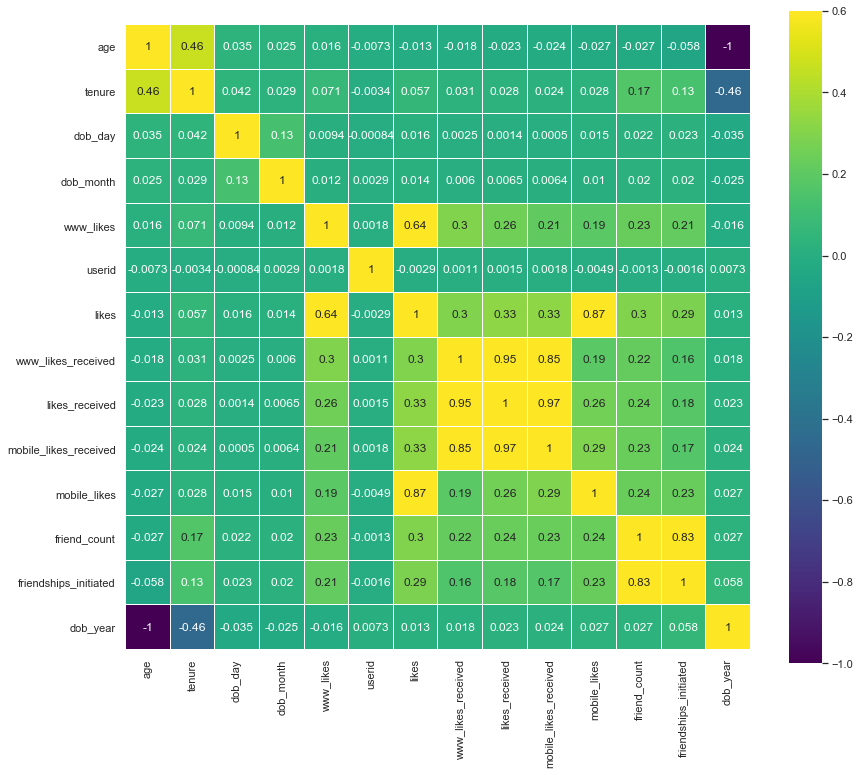

In [54]:
k= 14
cols = corr.nlargest(k,'age')['age'].index
print(cols)
cm = np.corrcoef(lens[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.6, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

###### From Heatmap, zoomed heatmap and clustermap we can exclude high correlated columns to perform model analysis. 

Observations :

Initial glance it is observed that there are two & three red colored squares that get my attention which is 'likes' & 'mobile_likes', 'likes' & 'www_likes', 'likes_received' & 'mobile_likes_received', 'likes_received' & 'www_likes_received', 'www_likes_received' & 'mobile_likes_received', ('tenure', 'age' & 'dob_year') and 'friend_count' & 'friendships_initiated'

'likes' & 'mobile_likes' and 'likes' & 'www_likes' are also closely correlated so one of them we can keep for futher analysis and other 2 features can be dropped 'mobile_likes' and 'www_likes'.

'likes' is strongly correlated with 'mobile_likes' and 'www_likes' as sum of www_likes and mobile_likes is 'likes' column. Similarly 'likes_received' is strongly correlated with 'mobile_likes_received' and 'www_likes_received' as sum of www_likes_received and mobile_likes_received is 'likes' column.

'friend_count' & 'friendship_initiated' are closely correlated hence 'friendship_initiated' column is excluded.
'dob_year' is negatively correlated with 'age' and 'tenure' also 'age' & 'tenure' strongly correlated. 
'dob_month' and 'dob_day' are not depend on other features hence we are excluding 'dob_year', 'dob_month' and 'dob_day'.

##### Redrawing Diverging heatmap and Cluster plot with selected features 

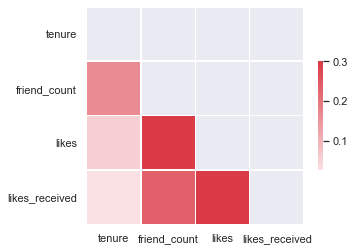

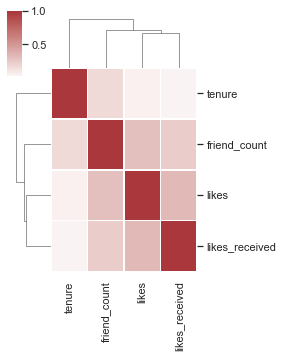

In [55]:
df = lens[['age','tenure', 'friend_count','likes','likes_received','gender']]
df.set_index('age', inplace=True)
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g= sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.clustermap(corr, center=0, cmap="vlag",linewidths=.75, figsize=(4, 5))

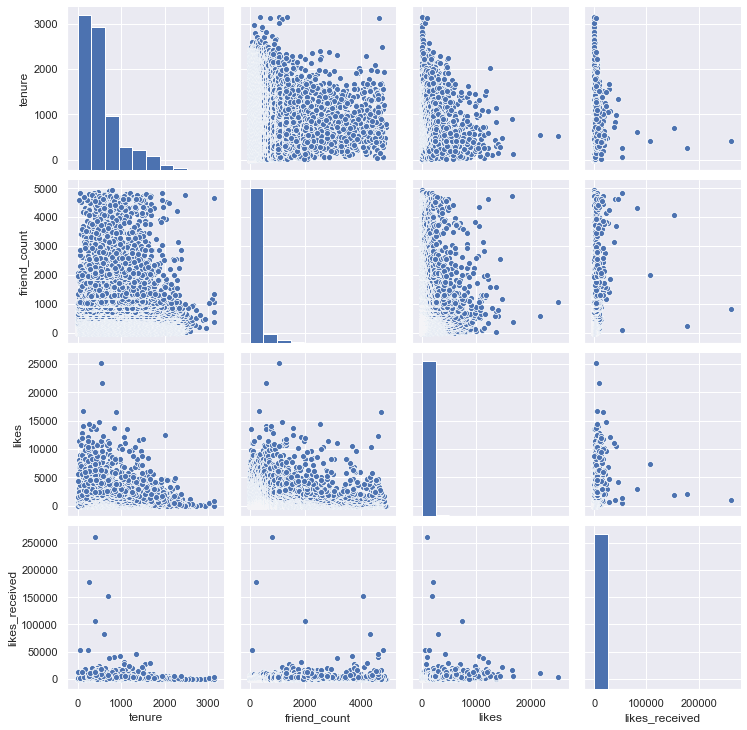

In [56]:
sns.pairplot(df)

#### From above Pariplot we can see straight line getting formed hence drawing Scatter plots between the most correlated variables
The following features we have excluded from model selection but still like to draw scatter regression line.
- 'likes' & 'mobile_likes', 'likes' & 'www_likes', 
- 'likes_received' & 'mobile_likes_received' Combination is graph created others are not created as it will be similar for 'likes_received' & 'www_likes_received', 'www_likes_received' & 'mobile_likes_received', 
- 'friend_count' & 'friendships_initiated'

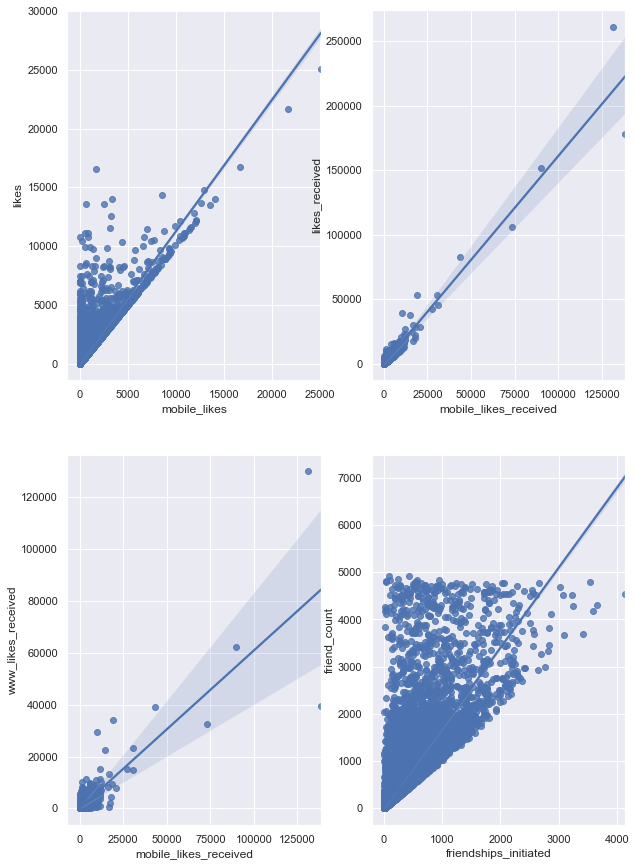

In [57]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,15))
scatter_plot = pd.concat([lens['likes'],lens['mobile_likes']],axis = 1)
sns.regplot(x='mobile_likes',y = 'likes',data = scatter_plot,scatter= True, fit_reg=True, ax=ax1)

scatter_plot = pd.concat([lens['likes_received'],lens['mobile_likes_received']],axis = 1)
sns.regplot(x='mobile_likes_received',y = 'likes_received',data = scatter_plot,scatter= True, fit_reg=True, ax=ax2)

scatter_plot = pd.concat([lens['www_likes_received'],lens['mobile_likes_received']],axis = 1)
sns.regplot(x='mobile_likes_received',y = 'www_likes_received',data = scatter_plot,scatter= True, fit_reg=True, ax=ax3)

#scatter_plot = pd.concat([lens['tenure'],lens['dob_year']],axis = 1)
#sns.regplot(x='dob_year',y = 'tenure',data = scatter_plot,scatter= True, fit_reg=True, ax=ax4)

scatter_plot = pd.concat([lens['friend_count'],lens['friendships_initiated']],axis = 1)
sns.regplot(x='friendships_initiated',y = 'friend_count',data = scatter_plot,scatter= True, fit_reg=True, ax=ax4)

##### From above Pariplot we can see straight line getting formed between 'likes_received' and 'likes', 'friend_count' & 'tenure' hence drawing scatter regression line. 
From those figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line.

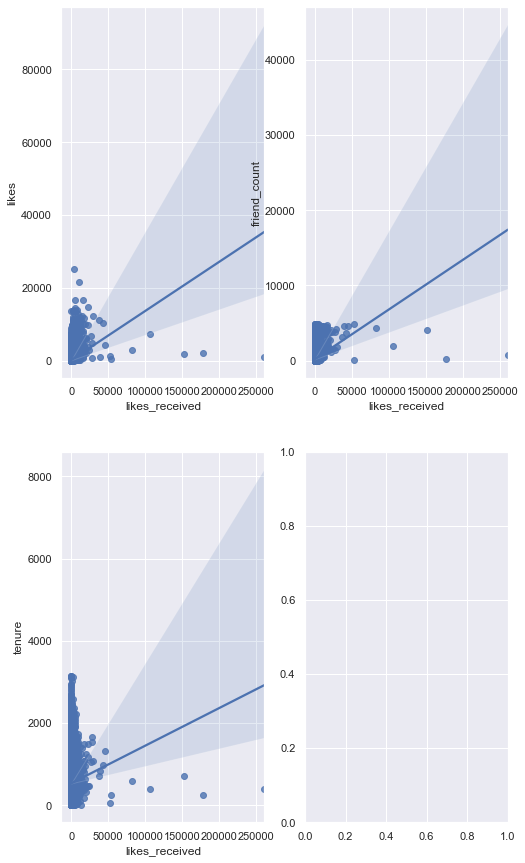

In [58]:
fig, ((ax6,ax7),(ax8,ax9)) = plt.subplots(nrows=2, ncols=2, figsize=(8,15))

scatter_plot = pd.concat([lens['likes'],lens['likes_received']],axis = 1)
sns.regplot(x='likes_received',y = 'likes',data = scatter_plot,scatter= True, fit_reg=True, ax=ax6)

scatter_plot = pd.concat([lens['friend_count'],lens['likes_received']],axis = 1)
sns.regplot(x='likes_received',y = 'friend_count',data = scatter_plot,scatter= True, fit_reg=True, ax=ax7)

scatter_plot = pd.concat([lens['tenure'],lens['likes_received']],axis = 1)
sns.regplot(x='likes_received',y = 'tenure',data = scatter_plot,scatter= True, fit_reg=True, ax=ax8)